<a href="https://colab.research.google.com/github/mborkhat/Data-Science-Projects/blob/master/The%20German%20Traffic%20Sign%20Recognition/Mayur_Borkhatariya_D008_MtechDS_DL_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf

keras.backend.clear_session(

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq" -O train.p && rm -rf /tmp/cookies.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJxB1YzBYuImaHBSxWGN-ZXPDRYN_CTX' -O valid.p
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jZhZpEZkYFaaPPAwfd1cB8e-FK0aoeC0' -O test.p

--2020-09-29 08:29:52--  https://docs.google.com/uc?export=download&confirm=9yt3&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq
Resolving docs.google.com (docs.google.com)... 74.125.20.102, 74.125.20.138, 74.125.20.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-4o-docs.googleusercontent.com/docs/securesc/5dodjn2voiq1nqektlidcb1tmj45pce9/5gotn6j6mij0olbneetgcgsa2hkpam9t/1601368125000/17242455652310080862/00126603162453290951Z/1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq?e=download [following]
--2020-09-29 08:29:52--  https://doc-0c-4o-docs.googleusercontent.com/docs/securesc/5dodjn2voiq1nqektlidcb1tmj45pce9/5gotn6j6mij0olbneetgcgsa2hkpam9t/1601368125000/17242455652310080862/00126603162453290951Z/1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq?e=download
Resolving doc-0c-4o-docs.googleusercontent.com (doc-0c-4o-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to 

In [3]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [6]:
X_validation.shape,y_validation.shape

((4410, 32, 32, 3), (4410,))

In [7]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

30

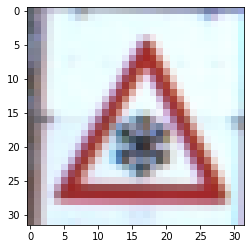

In [8]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

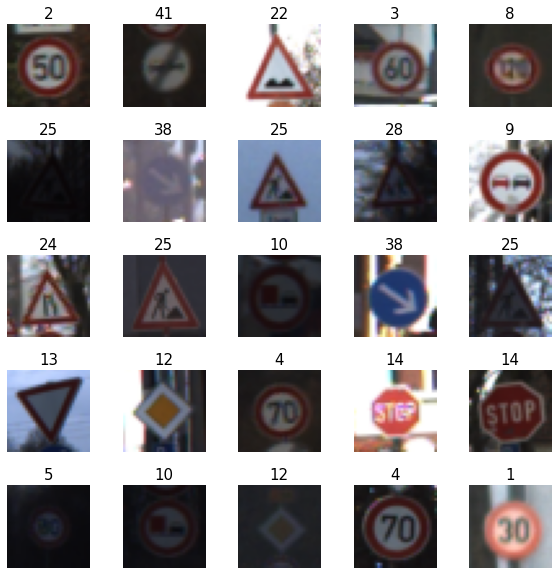

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [12]:
X_train_gray.shape,X_test_gray.shape,X_validation_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

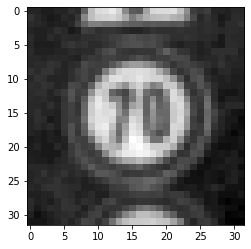

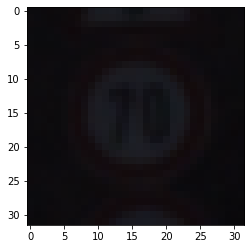

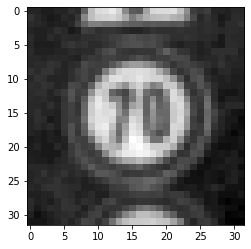

In [14]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [15]:
#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_validation = to_categorical(y_validation, 43)
y_test=to_categorical(y_test, 43)

In [16]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_gray_norm.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [17]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train_gray_norm, y_train, batch_size=32, epochs=epochs,
validation_data=(X_validation_gray_norm, y_validation))


Epoch 1/20
1088/1088 [==============================] - 5s 5ms/step - loss: 0.9537 - accuracy: 0.7338 - val_loss: 0.1853 - val_accuracy: 0.9512
Epoch 2/20
1088/1088 [==============================] - 4s 4ms/step - loss: 0.1840 - accuracy: 0.9434 - val_loss: 0.1201 - val_accuracy: 0.9662
Epoch 3/20
1088/1088 [==============================] - 5s 4ms/step - loss: 0.1185 - accuracy: 0.9645 - val_loss: 0.1043 - val_accuracy: 0.9694
Epoch 4/20
1088/1088 [==============================] - 5s 4ms/step - loss: 0.0909 - accuracy: 0.9714 - val_loss: 0.0888 - val_accuracy: 0.9773
Epoch 5/20
1088/1088 [==============================] - 5s 4ms/step - loss: 0.0787 - accuracy: 0.9766 - val_loss: 0.0866 - val_accuracy: 0.9807
Epoch 6/20
1088/1088 [==============================] - 5s 4ms/step - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.1167 - val_accuracy: 0.9769
Epoch 7/20
1088/1088 [==============================] - 5s 4ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0767 - val_accuracy:

In [18]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.2352 - accuracy: 0.9673
Test Accuracy: 0.9673000574111938


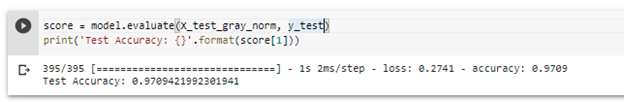

**APPLYING DATA AUGMENTATION**

(32, 32, 32, 1)


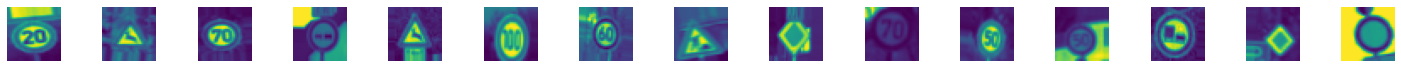

In [19]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.3,
                            shear_range=0.1,
                            rotation_range=9.)
 
datagen.fit(X_train)
batches = datagen.flow(X_train_gray_norm, y_train, batch_size = 32)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,MaxPooling2D
from keras.optimizers import Adam

def modified_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_gray_norm.shape[1:]))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.25))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(43, activation='softmax'))

  #Compilation of the model
  model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
  )
  return model

In [22]:
model = modified_model()
print(model.summary())
 
history_new = model.fit_generator(datagen.flow(X_train_gray_norm, y_train, batch_size=32),
                            epochs=20,
                            validation_data=(X_validation_gray_norm, y_validation))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 64)         

In [23]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.0837 - accuracy: 0.9797
Test Accuracy: 0.9797307848930359


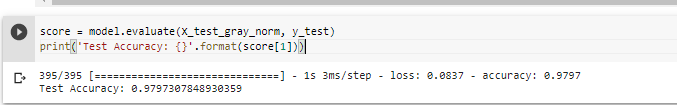